## EAD Model

In [1]:
#import Libraries
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('loan_data/lgd_preprocessed_data.csv', index_col=0)
data1 = pd.read_csv('loan_data/lgd_preprocessed_data1.csv', index_col=0)

In [3]:
pd.options.display.max_columns=None

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,initial_list_status,total_rec_prncp,total_rec_int,recoveries,acc_now_delinq,total_rev_hi_lim,emp_length_int,term_int,earliest_cr_line_mnths,mnths_since_issue_date,grade_freq,sub_grade_freq,home_ownership_freq,purpose_freq,addr_state_freq,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,initial_list_status:f,initial_list_status:w,recovery_rate,CCF,recovery_rate_0_1
1,1077430,1314167,2500,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,5.0,0.0,0.0,3.0,0.0,4.0,f,456.46,435.17,117.08,0.0,2500.0,0,60,224.0,72.0,12069,2441,20258,438,1313,0,1,0,1,0,0.046832,0.817416,1
8,1071795,1306957,5600,5600,21.28,152.39,F,F2,OWN,40000.0,Source Verified,Charged Off,small_business,958xx,CA,5.55,0.0,2.0,0.0,0.0,11.0,0.0,13.0,f,162.02,294.94,189.06,0.0,5600.0,4,60,164.0,72.0,2778,600,3785,1394,7011,0,1,0,1,0,0.033761,0.971068,1
9,1071570,1306721,5375,5375,12.69,121.45,B,B5,RENT,15000.0,Verified,Charged Off,other,774xx,TX,18.08,0.0,0.0,0.0,0.0,2.0,0.0,3.0,f,673.48,533.42,269.29,0.0,5375.0,0,60,159.0,72.0,9242,2045,20258,2892,2883,0,0,1,1,0,0.050100,0.874701,1
12,1064687,1298717,9000,9000,13.49,305.38,C,C1,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,245xx,VA,10.08,0.0,1.0,0.0,0.0,4.0,0.0,9.0,f,1256.14,570.26,444.30,0.0,9000.0,0,36,164.0,72.0,12069,2363,20258,26127,1348,0,1,0,1,0,0.049367,0.860429,1
14,1069057,1303503,10000,10000,10.65,325.74,B,B2,RENT,100000.0,Source Verified,Charged Off,other,951xx,CA,7.06,0.0,2.0,0.0,0.0,14.0,0.0,29.0,f,5433.47,1393.42,645.10,0.0,10000.0,3,36,319.0,72.0,9242,1554,20258,2892,7011,0,1,0,1,0,0.064510,0.456653,1


In [5]:
data.shape, data1.shape

((43236, 46), (43236, 162))

### Splitting the data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#data 1
X_train, X_test, y_train, y_test = train_test_split(data.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1),
                                                   data['CCF'], random_state=42)

In [8]:
#data 2
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1),
                                                   data1['CCF'], random_state=42)

In [9]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'acc_now_delinq', 'total_rev_hi_lim',
       'emp_length_int', 'term_int', 'earliest_cr_line_mnths',
       'mnths_since_issue_date', 'grade_freq', 'sub_grade_freq',
       'home_ownership_freq', 'purpose_freq', 'addr_state_freq',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'verification_status:Verified',
       'initial_list_status:f', 'initial_list_status:w', 'recovery_rate',
       'CCF', 'recovery_rate_0_1'],
      dtype='object')

In [10]:
data_features_all = [
'funded_amnt', 'int_rate', 'installment', 'annual_inc',
'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
'pub_rec', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim',
'emp_length_int', 'term_int', 'earliest_cr_line_mnths',
'mnths_since_issue_date', 'grade_freq', 'sub_grade_freq',
'home_ownership_freq', 'purpose_freq', 'addr_state_freq', 'initial_list_status:w', 'initial_list_status:f',
'verification_status:Not Verified', 'verification_status:Source Verified', 'verification_status:Verified'
]

data_ref_cat = [
'verification_status:Verified',
'initial_list_status:f'
]

In [11]:
data1.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status', 'total_rec_prncp',
       'total_rec_int', 'recoveries', 'acc_now_delinq',
       'total_rev_hi_lim', 'emp_length_int', 'term_int',
       'earliest_cr_line_mnths', 'mnths_since_issue_date', 'grade:A',
       'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
       'sub_grade:A1', 'sub_grade:A2', 'sub_grade:A3', 'sub_grade:A4',
       'sub_grade:A5', 'sub_grade:B1', 'sub_grade:B2', 'sub_grade:B3',
       'sub_grade:B4', 'sub_grade:B5', 'sub_grade:C1', 'sub_grade:C2',
       'sub_grade:C3', 'sub_grade:C4', 'sub_grade:C5', 'sub_grade:D1',
       'sub_grade:D2', 'sub_grade:D3', 'sub_g

In [12]:
data1_features_all = [
'funded_amnt', 'int_rate', 'installment', 'annual_inc',
'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
'pub_rec', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim',
'emp_length_int', 'term_int', 'earliest_cr_line_mnths',
'mnths_since_issue_date', 'initial_list_status:f', 'initial_list_status:w',
'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE', 'home_ownership:OTHER', 'home_ownership:OWN', 'home_ownership:RENT',
'verification_status:Not Verified', 'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car', 'purpose:credit_card', 'purpose:debt_consolidation',
'purpose:educational', 'purpose:home_improvement', 'purpose:house',
'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
'purpose:other', 'purpose:renewable_energy',
'purpose:small_business', 'purpose:vacation', 'purpose:wedding', 'total_rev_hi_lim'
]

data1_ref_cat = [
'grade:G', 'home_ownership:RENT', 'purpose:credit_card', 'initial_list_status:f'
]

In [13]:
X_train = X_train[data_features_all]
X_train1 = X_train1[data1_features_all]

In [14]:
X_test = X_test[data_features_all]
X_test1 = X_test1[data1_features_all]

In [15]:
X_train = X_train.drop(data_ref_cat, axis=1)
X_train1 = X_train1.drop(data1_ref_cat, axis=1)

X_test = X_test.drop(data_ref_cat, axis=1)
X_test1 = X_test1.drop(data1_ref_cat, axis=1)

#### Modelling

In [18]:
from sklearn.metrics import mean_squared_error, r2_score 

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
pred = rf.predict(X_test)

In [25]:
r2_score(y_test, pred)

0.30474746016661325

In [26]:
y_test_temp = y_test
y_test_temp.reset_index(drop=True, inplace=True)

In [27]:
pd.concat([y_test_temp, pd.DataFrame(pred)], axis=1).corr()

,CCF,0
CCF,1.000000,0.553141
0,0.553141,1.000000


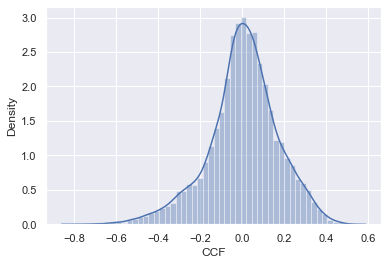

In [28]:
#look at the distribusion btw actual and predicted
sns.distplot(y_test - pred);

In [29]:
pd.DataFrame(pred).describe()

,0
count,10809.000000
mean,0.730871
std,0.117660
min,0.402605
25%,0.632552
50%,0.731411
75%,0.830585
max,0.969516


#### Model 2

In [30]:
rf1 = RandomForestRegressor()
rf1.fit(X_train1, y_train1)

RandomForestRegressor()

In [31]:
pred1 = rf1.predict(X_test1)

In [37]:
r2_score(y_test1, pred1)

0.3013543915966619

In [38]:
y_test_temp = y_test1
y_test_temp.reset_index(drop=True, inplace=True)

In [39]:
pd.concat([y_test_temp, pd.DataFrame(pred1)], axis=1).corr()

,CCF,0
CCF,1.000000,0.550315
0,0.550315,1.000000


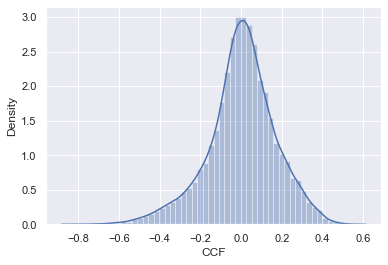

In [40]:
#look at the distribusion btw actual and predicted
sns.distplot(y_test1 - pred1);

In [41]:
pd.DataFrame(pred1).describe()

,0
count,10809.000000
mean,0.731353
std,0.118103
min,0.406516
25%,0.633112
50%,0.734573
75%,0.830888
max,0.965421


#### we'll use the second model as there's no much difference btw the two

#### Save the Model

In [42]:
import pickle

pickle.dump(rf1, open('model/ead_model.pkl', 'wb'))